In [ ]:
import sys
sys.path.insert(0, '../gofher')

import os
import matplotlib.image as mpimg

from gofher import run_gofher
from visualize import visualize

In [ ]:
name = "NGC1"
paper_label = "s"
folder = "figure9"

In [ ]:
#path_to_input = "..\\..\\spin-parity-catalog-data\\panstarrs\\{}".format(folder)
path_to_input = "../../spin-parity-catalog-data/panstarrs/{}".format(folder)
path_to_output = "..\\..\\..\\"

In [ ]:
def get_fits_path(name,band):
    """the file path of where existing fits files can be found"""
    return os.path.join(path_to_input,name,"{}_{}.fits".format(name,band))

def get_color_image_path(name):
    return os.path.join(path_to_input,name,"{}_color.jfif".format(name))

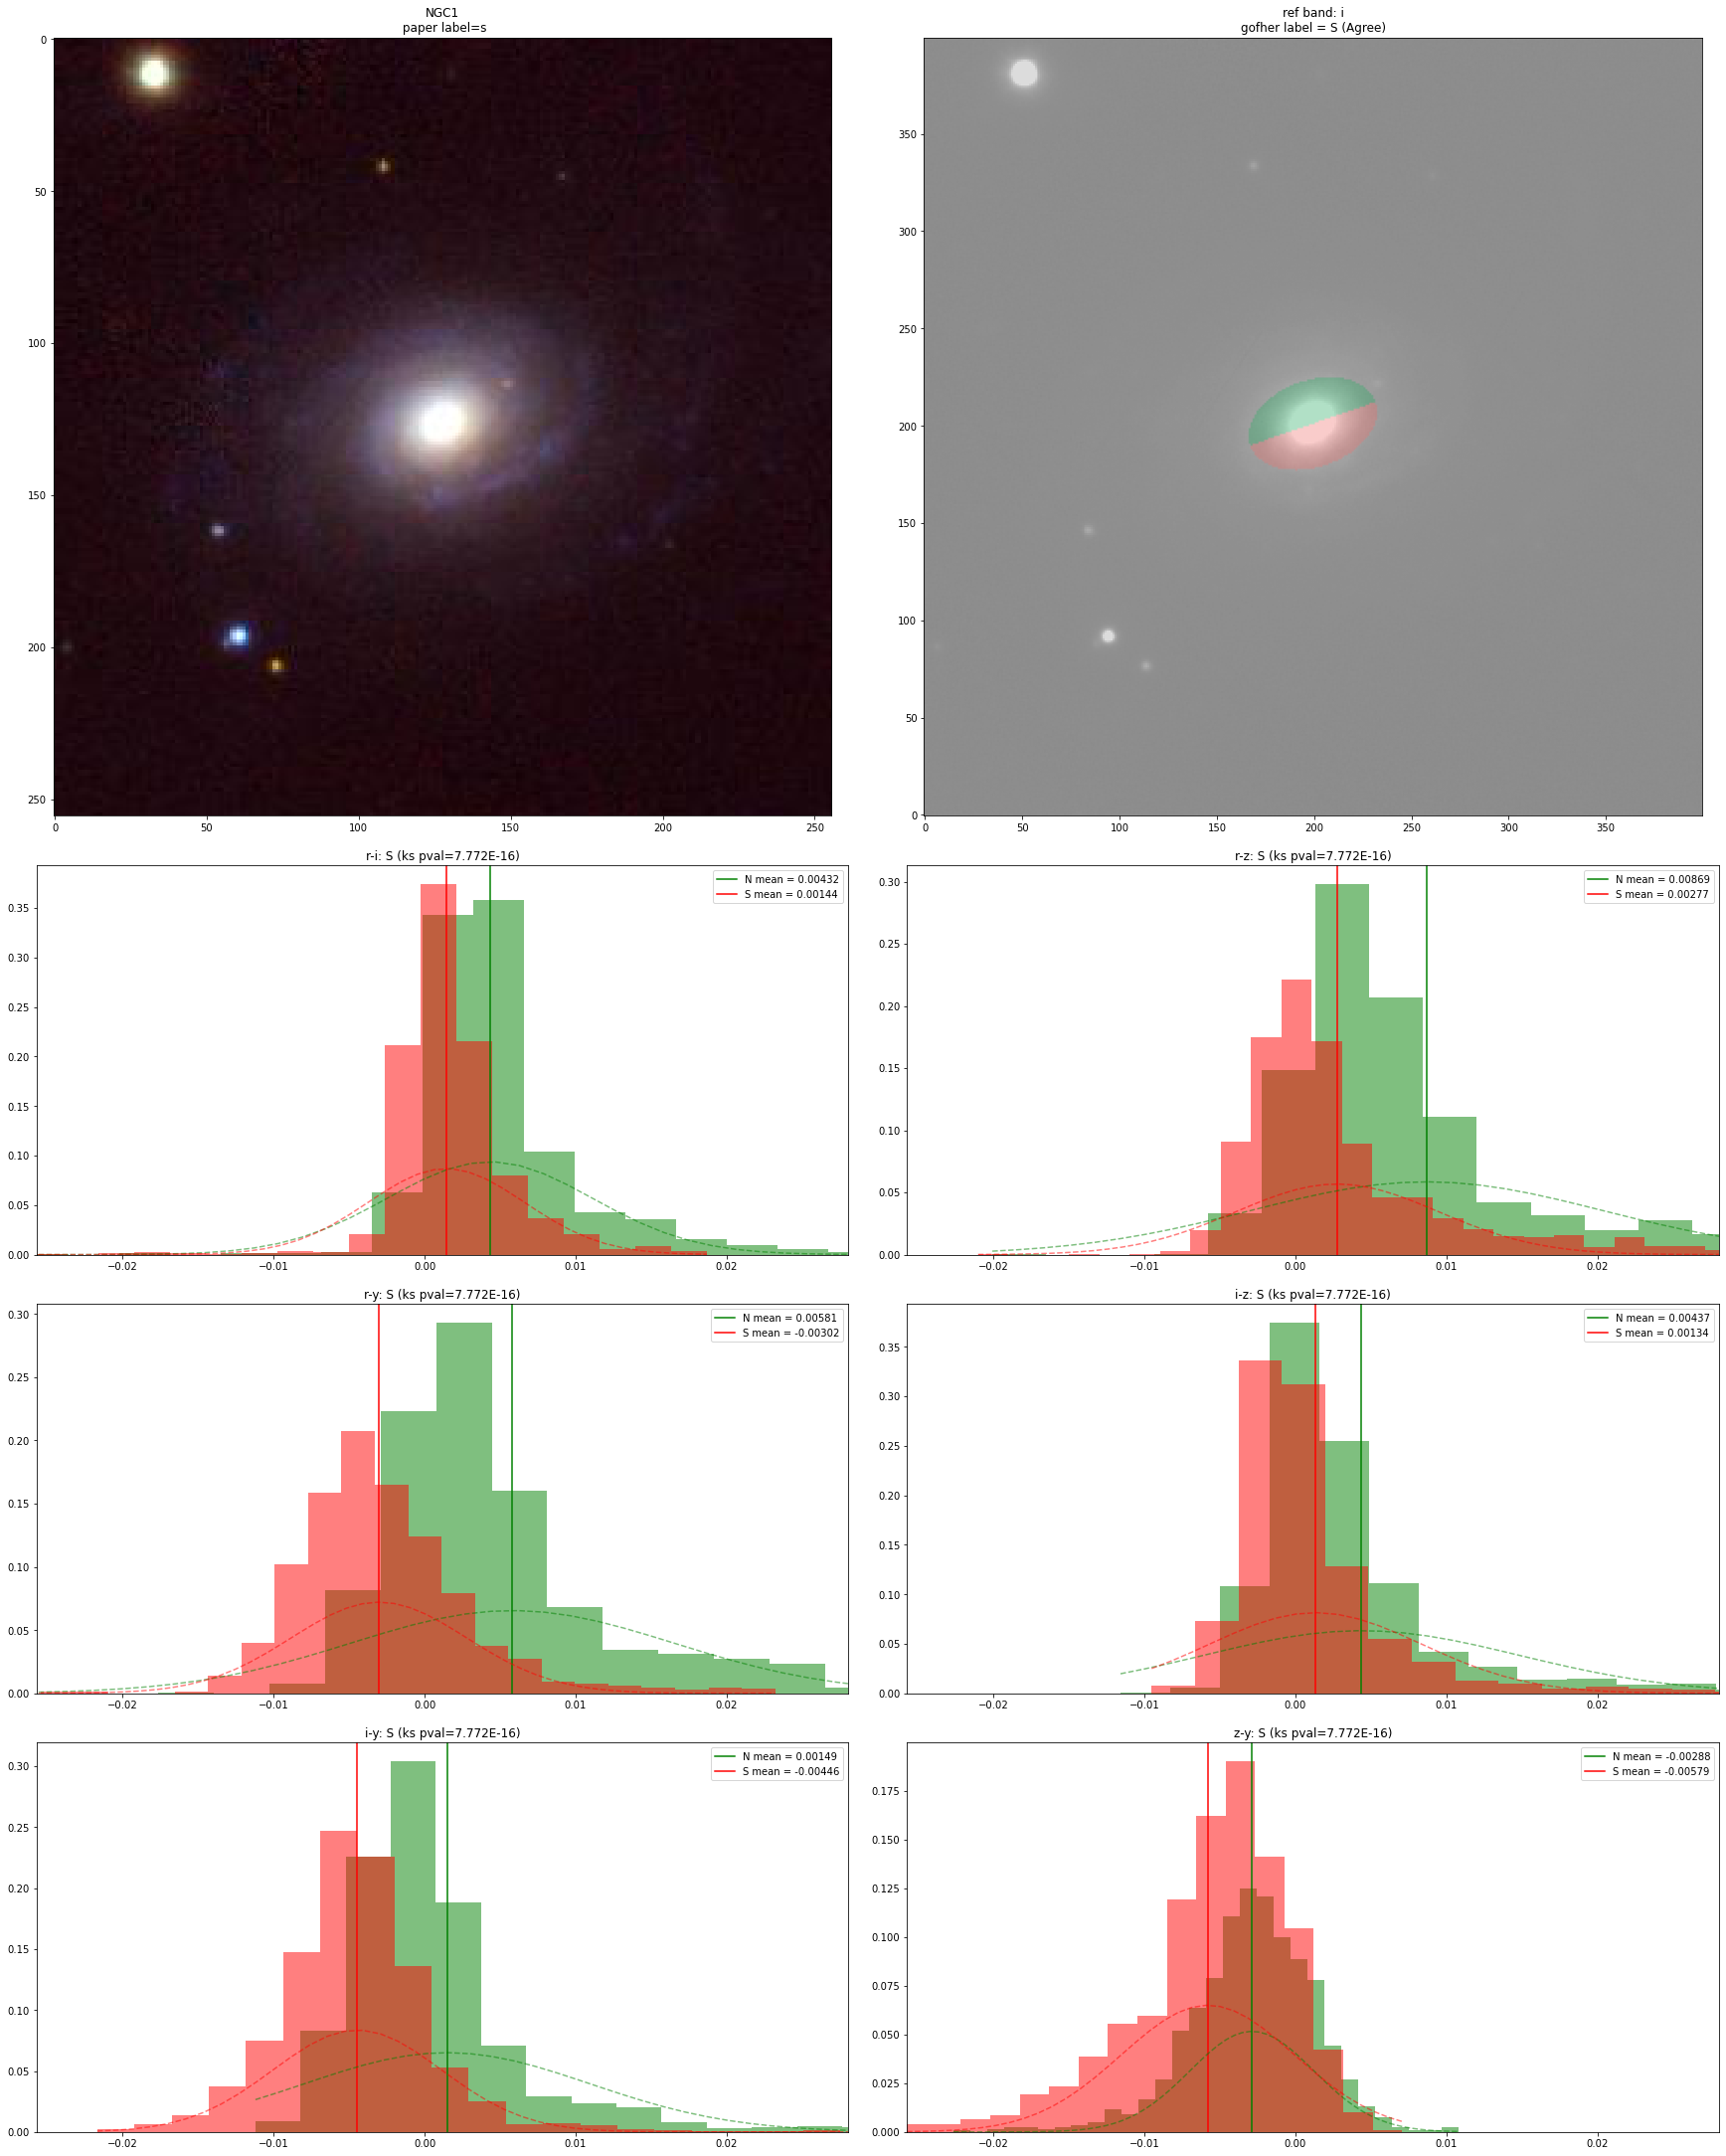

In [ ]:
if not os.path.exists(path_to_input):
    raise ValueError("The path to the input is not found {} - make sure you update path_to_input".format(path_to_input))

#if not os.path.exists(path_to_output):
#    raise ValueError("The path output is not found {} - make sure you update ppath_to_output".format(path_to_output))

gal = run_gofher(name,get_fits_path,['g','r','i','z','y'],['i','z','y','r'], paper_label)

color_image = color = mpimg.imread(get_color_image_path(name))
visualize(gal,color_image,['r','i','z','y'],paper_label)

#(header,row) = gal.get_verbose_csv_header_and_row(['r','i','z','y'],paper_label)
#print(header)
#print(row)

In [6]:
print(gal.gofher_params.theta)
print(gal.gofher_params.x)
print(gal.gofher_params.y)
print(gal.gofher_params.a)
print(gal.gofher_params.b)

0.3330246602493865
199.46126458855477
200.80286800708194
34.1035270690918
22.259815216064453
